# Data Generation Sheet

This notebook is adapted from the creators of the game we played, Survival of the Best Fit, via their [**Github Repository**](https://github.com/survivalofthebestfit/survivalofthebestfit/blob/master/data-engineering/biased-data-gen.ipynb). Github Repositories (or repos for short) allow creators and collaborators to store and share materials for projects, as well as engage in version control.

If you wondered how the data for the candidates in the game were created, this Python code provides some insights. We will walk you through the data simulation. You will recognize some lines of code, but others will be new! Don't feel like you have to understand all the lines of code, we'll explain what's happening by block. However, feel free to run the code cells and make edits to the code to see how the data changes, if you're interested.

This is some exposure to code written in the wild!

The choices made here have significant impacts on the results of the simulation, mirroring the real world. Let's take a look at what is happening behind the scenes.

### Imports

We import the features we need from various libraries, as seen below. Most of these libraries are pretty standard and are used in many Python programs, such as numpy, pandas, and matplotlib.

In [ ]:
!pip install faker
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import random
import json
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

&#9989;&nbsp; Which libraries do you recognize? Which libraries are new? Search for the new libraries in the Python documentation or on Google to see what they do.

<font size=6 color="#009600">&#9998;</font>   *Write your answers here.*

### Initializing variables

When simulating data, there's a lot of different "knobs" we can turn, that greatly affect our outputs. This is what happening below: we're deciding to what values we're turning the knobs.

Doing this outside of the main body of the code is good practice, in comparison to just putting a bunch of numbers scattered in the code below. It is easier to read, and we can save time digging around the code to make sure we've changed all the numbers if we want to readjust our knobs.

In [ ]:
group_size = 1000
test_group_size = 1000
skew = 5
fake = Faker('en').name

mini = 0
maxi = 10
city_bias = 0.1

### Building our Blue People!

Here, our blue folks are made, and given several attributes about themselves - including their name, city (from 2 choices), skill level, work experience, and more!


The quantitative attributes, such as skill level, come from a [power distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.power.html) with a few transformations.

After simulating 1000 entries for each of the attributes, each person is constructed as a row of a dataframe. The first five entries are seen when the cell is below is run!

In [ ]:
#blue group
skill = np.random.power(1.6, size=group_size) * -maxi + maxi
work = np.random.power(1.6, size=group_size) * -maxi + maxi
school = np.random.power(1.6, size=group_size) * -maxi + maxi
ambition = np.random.power(1.6, size=group_size) * -maxi + maxi
name =  np.array([fake() for _ in range(group_size)])
city = np.random.choice(2, group_size, p=[1-city_bias, city_bias])
color =  np.array(['blue' for _ in range(group_size)])

blue_group = pd.DataFrame({'name': name, 'city': city, 'color': color, 'work': work.astype(int), 'school': school.astype(int), 'ambition': ambition.astype(int), 'skill': skill.astype(int)})

blue_group.head()



,name,city,color,work,school,ambition,skill
0,Gary Holmes,0,blue,2,5,6,5
1,Mrs. Katherine Rush,0,blue,2,2,3,0
2,David Hill,0,blue,0,8,2,3
3,Mary Mcbride,0,blue,6,3,7,8
4,Laura Campbell,1,blue,0,7,1,8


Text(0.5, 1.0, 'Skill')

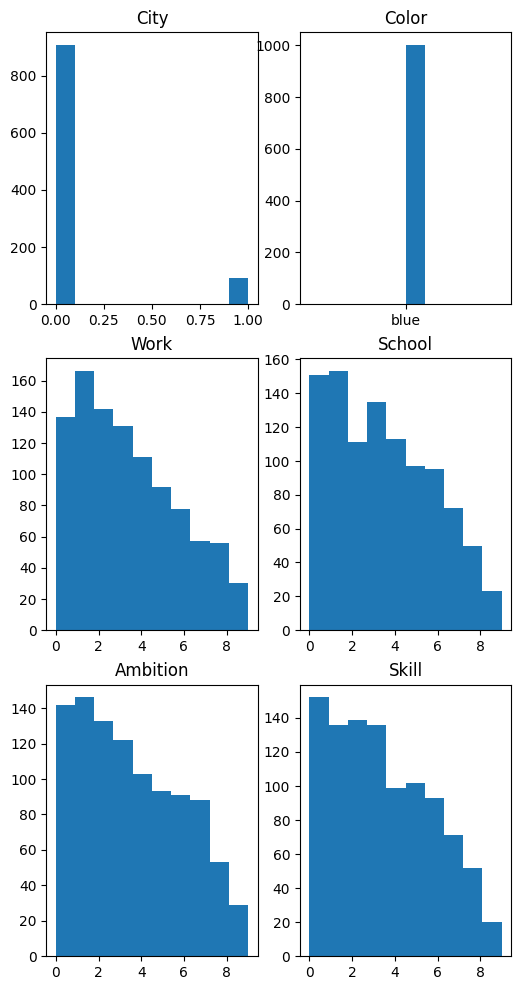

In [ ]:
#plotting the distributions in the blue group

plt.figure(figsize = (6,12))
plt.tight_layout()

plt.subplot(3,2,1)
plt.hist(blue_group['city'])
plt.title('City')

plt.subplot(3,2,2)
plt.hist(blue_group['color'])
plt.title('Color')

plt.subplot(3,2,3)
plt.hist(blue_group['work'])
plt.title('Work')

plt.subplot(3,2,4)
plt.hist(blue_group['school'])
plt.title('School')

plt.subplot(3,2,5)
plt.hist(blue_group['ambition'])
plt.title('Ambition')

plt.subplot(3,2,6)
plt.hist(blue_group['skill'])
plt.title('Skill')


### Now the Orange People!

Notice the orange folks are given the same attributes! But something slightly different is used for their data generation - can you tell what it is?



In [ ]:
#orange group

skill = np.random.randint(mini, maxi, group_size)
work = np.random.randint(mini, maxi, group_size)
school = np.random.randint(mini, maxi, group_size)
ambition = np.random.randint(mini, maxi, group_size)
name =  np.array([fake() for _ in range(group_size)])
city = np.random.choice(2, group_size, p=[city_bias, 1-city_bias])
color =  np.array(['orange' for _ in range(group_size)])

orange_group = pd.DataFrame({'name': name, 'city': city, 'color': color, 'work': work, 'school': school, 'ambition': ambition, 'skill': skill})

orange_group.head()

,name,city,color,work,school,ambition,skill
0,David Ford,1,orange,5,8,1,6
1,Cindy Griffith,1,orange,9,3,7,3
2,Megan Perez,1,orange,7,5,8,0
3,Rachel Merritt,1,orange,3,0,5,1
4,Alexandra Vaughn,1,orange,8,0,2,7


As you may have noticed, the quantitative attributes no longer come from a power distribution, but a [discrete uniform distibution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) between $[mini, maxi)$.


Text(0.5, 1.0, 'Skill')

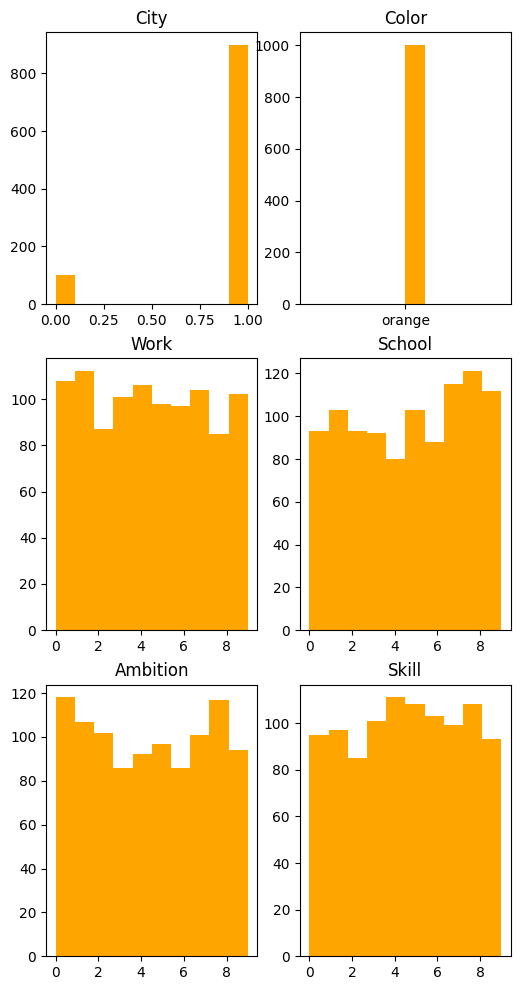

In [ ]:
plt.figure(figsize = (6,12))
plt.tight_layout()

plt.subplot(3,2,1)
plt.hist(orange_group['city'], color = 'orange')
plt.title('City')

plt.subplot(3,2,2)
plt.hist(orange_group['color'], color = 'orange')
plt.title('Color')

plt.subplot(3,2,3)
plt.hist(orange_group['work'], color = 'orange')
plt.title('Work')

plt.subplot(3,2,4)
plt.hist(orange_group['school'], color = 'orange')
plt.title('School')

plt.subplot(3,2,5)
plt.hist(orange_group['ambition'],color = 'orange')
plt.title('Ambition')

plt.subplot(3,2,6)
plt.hist(orange_group['skill'], color ='orange')
plt.title('Skill')


&#9989;&nbsp; Examine the histograms for the blue and orange people above. How do the sets of histograms compare? How would this affect the game and your choices in the game?

<font size=6 color="#009600">&#9998;</font>   *Write your answers here.*

### Employability

Next, we determine which folks from the blue group and which from the orange group are employable based on their school, work, skill, and ambition characteristics. A small fuzzing factor is used to add a bit of variability.

The end of the cell shows a few descriptive statistics between the orange and blue groups regarding employability. 


In [ ]:
# checking employability
fuzz_min = 99
fuzz_max = 101

# decide whether person was employed based on threshold and small fuzzing
orange_group['empl'] = np.where((orange_group['school'] + orange_group['work'] + orange_group['skill'] + orange_group['ambition']) * np.random.randint(fuzz_min, fuzz_max, size=len(orange_group)) // 90 > 16, 1, 0)
blue_group['empl'] = np.where((blue_group['school'] + blue_group['work'] + blue_group['skill'] + blue_group['ambition']) * np.random.randint(fuzz_min, fuzz_max, size=len(blue_group)) // 90 > 24, 1, 0)

print("Orange Group Employment Mean: ", orange_group['empl'].mean())
print("Total Employable Orange: ", orange_group['empl'].sum())
print(orange_group.head())
print("\n")
print("Blue Group Employment Mean: ", blue_group['empl'].mean())
print("Total Employable Blue: ", blue_group['empl'].sum())
print(blue_group.head())

Orange Group Employment Mean:  0.663
Total Employable Orange:  663
               name  city   color  work  school  ambition  skill  empl
0        David Ford     1  orange     5       8         1      6     1
1    Cindy Griffith     1  orange     9       3         7      3     1
2       Megan Perez     1  orange     7       5         8      0     1
3    Rachel Merritt     1  orange     3       0         5      1     0
4  Alexandra Vaughn     1  orange     8       0         2      7     1


Blue Group Employment Mean:  0.047
Total Employable Blue:  47
                  name  city color  work  school  ambition  skill  empl
0          Gary Holmes     0  blue     2       5         6      5     0
1  Mrs. Katherine Rush     0  blue     2       2         3      0     0
2           David Hill     0  blue     0       8         2      3     0
3         Mary Mcbride     0  blue     6       3         7      8     1
4       Laura Campbell     1  blue     0       7         1      8     0


&#9989;&nbsp; What differences do you notice in the groups? Why is this the case?

<font size=6 color="#009600">&#9998;</font>   *Write your answers here.*

The next plots show the distribution of orange and blue folks based on their employability value. We notice the slight imbalance in the distribution of employment values between the groups, as well as how the chosen threshold affects the number of employable folks from each group. 

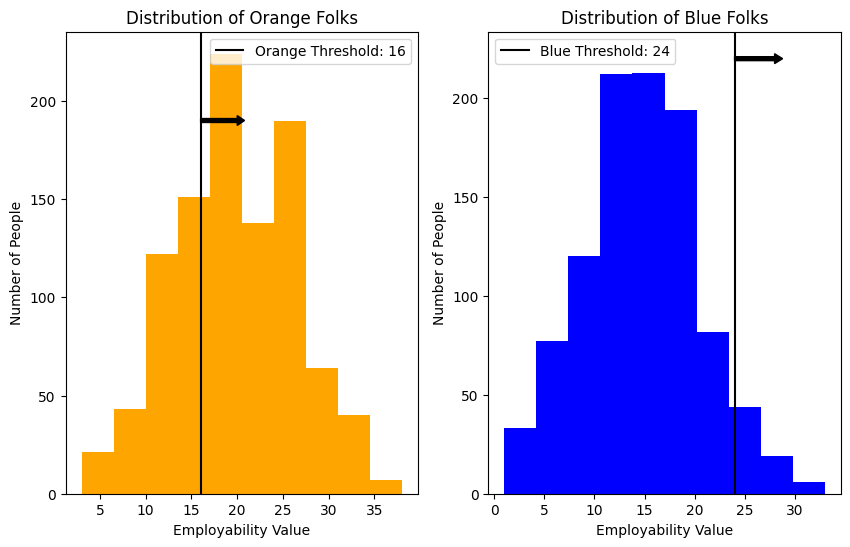

In [ ]:
why_16 = (orange_group['school'] + orange_group['work'] + orange_group['skill'] + orange_group['ambition']) * np.random.randint(fuzz_min, fuzz_max, size=len(orange_group))//90
why_24 = (blue_group['school'] + blue_group['work'] + blue_group['skill'] + blue_group['ambition']) * np.random.randint(fuzz_min, fuzz_max, size=len(blue_group)) // 90

plt.figure(figsize = (10,6))
plt.tight_layout()

plt.subplot(1,2,1)
plt.hist(why_16, color='orange')
plt.axvline(16, color='black', label='Orange Threshold: 16')
plt.arrow(16,190, 4,0,  width = 2, head_width = 5, head_length = 0.8, color ='black')
plt.title("Distribution of Orange Folks")
plt.xlabel("Employability Value")
plt.ylabel("Number of People")
plt.legend(loc = "upper right")

plt.subplot(1,2,2)
plt.hist(why_24, color='blue')
plt.axvline(24, color='black', label='Blue Threshold: 24')
plt.arrow(24,220, 4,0,  width = 2, head_width = 5, head_length = 0.8, color ='black')
plt.title("Distribution of Blue Folks")
plt.xlabel("Employability Value")
plt.ylabel("Number of People")
plt.legend()

&#9989;&nbsp; How do you think this affects the results of the model we are going to build?

<font size=6 color="#009600">&#9998;</font>   *Write your answer here.*

Here, we create a dataset with the combined blue and orange groups, however we only use the data of half of the blue folks. 

In [ ]:
# concat and shuffling rows
blue_size = int(group_size//2)
less_blue_group = blue_group[:blue_size]
cvData = pd.concat([less_blue_group, orange_group], ignore_index=True, sort=False).sample(frac=1).reset_index(drop=True)
cvData.describe()

,city,work,school,ambition,skill,empl
count,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.630000,4.03000,4.272667,4.080000,4.167333,0.454000
std,0.482965,2.83145,2.875152,2.884293,2.792705,0.498046
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.00000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,4.00000,4.000000,4.000000,4.000000,0.000000
75%,1.000000,6.00000,7.000000,7.000000,6.000000,1.000000
max,1.000000,9.00000,9.000000,9.000000,9.000000,1.000000


We split the data into a training and testing dataset. This is very typical in data science and machine learning as we want to assess the performance of our model on similar data to which it was trained on. (Ideally, we would like to use the full dataset, and then test the model on newly collected data, but that of course is not always possible in the real world.)

Our predictor variables are: city, work, school, ambition, and skill. Notice color is _not_ a predictor.

Our response variable is: employment. As you can see, this value is either 1 (they met the employability threshold), or 0 (they don't met the threshold).

In [ ]:
train, test = train_test_split(cvData, test_size=0.2)

train_x = train.drop(['name', 'color', 'empl'], axis='columns')
train_y = train['empl']
test_x = test.drop(['name', 'color', 'empl'], axis='columns')
test_y = test['empl']
print(train_x.head())
print(train_y.head())

      city  work  school  ambition  skill
487      1     1       9         8      6
281      1     1       4         4      5
1340     0     1       1         4      7
167      1     8       4         4      9
1397     1     1       6         5      1
487     1
281     0
1340    0
167     1
1397    0
Name: empl, dtype: int64


The creators decided to use a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). A classifier predicts which category (here: employable or not) a set of input values (here: city, work, school, ambition, and skill) should be associated to. A Random Forest model essentially combines the output of multiple [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree#:~:text=A%20decision%20tree%20is%20a,only%20contains%20conditional%20control%20statements.). This decreases the variability in the response and increases the accuracy of the model.  

The creators use an [F1 score](https://www.v7labs.com/blog/f1-score-guide) to assess the accuracy of the model. This is similar to traditional accuracy (how many correctly classified out of the total), but helps account potential diferences in the total number of folks from each class. The value is bounded between 0 and 1, with values closer to 1 indicating a better model.

In [ ]:
clf = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=0)
clf.fit(train_x, train_y)
predictions_test = clf.predict(test_x)
print('f1 accuracy: ', f1_score(predictions_test, test_y))

f1 accuracy:  0.7161572052401747


In the below cell, we compare the number of folks that were employed based on the actual data and the number of folks that were predicted to be employed based on the model.

While it would be interesting to compare what these ratios look like for each of the different colors, this isn't possible based on the way the model is set up. Recall, we _do not_ use color as a predictor of employability. However, the data generation was rigged so that the blue class would have lower values and also be accepted less. So, even though there is no bias in the model itself, the results of the model will inherently be biased based on the data we trained it on.  

In [ ]:
# True data employment
print("Total Number _Actual_ Employed: ", np.sum(test_y), ", Out of Total Number: ", len(test_y))


# Predicted employment from the model
print("Total Number _Predicted_ Employed: ", predictions_test.sum(), ", Out of Total Number: ", len(predictions_test))

test_x_wpreds = test_x
test_x_wpreds["predictions"] = predictions_test

test_x_wpreds.head()
print(test_x.groupby(['predictions']).sum())

Total Number _Actual_ Employed:  133 , Out of Total Number:  300
Total Number _Predicted_ Employed:  96 , Out of Total Number:  300
             city  work  school  ambition  skill
predictions                                     
0              88   628     699       757    770
1              96   587     515       460    454


### Conclusion

There we go: we've generated a whole slew of orange and blue candidates to apply to our job, as well as utilized an algorithm to do the classifying for us to determine which candidates would be employed!

The algorithm (Random Forest used here), is not independent of human bias. Remember, we had to feed it training data where we determined who we would employ before the algorithm could do its thing on the testing data. We have a saying for this, *Garbage In, Garbage Out*, meaning that if we input 'bad' or biased data into an algorithm, we'll get 'bad' or biased outputs.

This may seem over the top - given the creators designed the data to be biased at every step: from initial generation to employability criteria. We know and emphasize that being blue or orange (or any other identities we hold) does not determine our abilities, attitudes, and success.

*Survival of the Best Fit isn't far off from reality, unfortunately.* We now look at this example of [**Amazon running into bias in their own AI hiring tool**
](https://www.theguardian.com/technology/2018/oct/10/amazon-hiring-ai-gender-bias-recruiting-engine). The Orange and Blue folks in this case? Men and Women.


---
## Great job!

Now that you've gone through this notebook, return to the In Class Assignment.

This assignment was designed by AUTHOR XX and AUTHOR XX (2024) and built off a work from Gabor Csapo, Jihyun Kim, Miha Klasinc, and Alia ElKattan. 

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University